<a href="https://colab.research.google.com/github/ywang1110/Modeling_Triboelectric_Performance/blob/main/Absolute_Humidity___SEBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from IPython.display import display
from sklearn.feature_selection import f_regression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prepare dataset

## Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('drive/My Drive/1 Manuscript_AFM/Data process/3 NewData_Train - updateDiameter-Validiate.xlsx', sheet_name='mean')
df.head()

,Unnamed: 0,ChargeDensity(µC/m2) j,Thickness (um) x,solidity y,diameter (um) z,Interface (mm) u,Tem (°C),Humidity (%),Force (N),Technique
0,K-1,26.43,472.4,0.164,9.09225,1.728,26.4,25.9,35.5,Reicofil
1,K-2,28.35,568.1,0.180,9.30286,1.961,25.7,27.5,37.1,Reicofil
2,K-3,31.15,472.9,0.181,7.73240,1.501,26.9,28.5,36.1,Reicofil
3,K-4,30.28,600.2,0.179,7.77859,1.990,25.8,29.6,37.3,Reicofil
4,K-5,33.76,393.3,0.206,7.41502,1.106,26.9,28.5,36.1,Reicofil


In [4]:
df['Absolute humidity (g/m3)'] = (6.112*2.71828**((17.67*df['Tem (°C)'])/(df['Tem (°C)']+243.5))*df['Humidity (%)']*2.1674)/(273.15+df['Tem (°C)'])
df.head()

,Unnamed: 0,ChargeDensity(µC/m2) j,Thickness (um) x,solidity y,diameter (um) z,Interface (mm) u,Tem (°C),Humidity (%),Force (N),Technique,Absolute humidity (g/m3)
0,K-1,26.43,472.4,0.164,9.09225,1.728,26.4,25.9,35.5,Reicofil,6.450233
1,K-2,28.35,568.1,0.180,9.30286,1.961,25.7,27.5,37.1,Reicofil,6.585998
2,K-3,31.15,472.9,0.181,7.73240,1.501,26.9,28.5,36.1,Reicofil,7.297906
3,K-4,30.28,600.2,0.179,7.77859,1.990,25.8,29.6,37.3,Reicofil,7.128742
4,K-5,33.76,393.3,0.206,7.41502,1.106,26.9,28.5,36.1,Reicofil,7.297906


In [5]:
df.shape

(43, 11)

## Unit conversion

In [6]:
data = pd.DataFrame()
data['ChargeDensity(C/m2)']=df['ChargeDensity(µC/m2) j']*pow(10,-6)
data['thickness(m)']=df['Thickness (um) x']*pow(10,-6)
data['solidity'] = df['solidity y']
data['diameter(m)'] = df['diameter (um) z']*pow(10,-6)
data['Interface(m)']=df['Interface  (mm) u']*pow(10, -3)
data['Technique'] = df['Technique']
data[['Tem (°C)', 'Absolute humidity (g/m3)', 'Force (N)']]=df[['Tem (°C)', 'Absolute humidity (g/m3)', 'Force (N)']]

data.head()

,ChargeDensity(C/m2),thickness(m),solidity,diameter(m),Interface(m),Technique,Tem (°C),Absolute humidity (g/m3),Force (N)
0,0.000026,0.000472,0.164,0.000009,0.001728,Reicofil,26.4,6.450233,35.5
1,0.000028,0.000568,0.180,0.000009,0.001961,Reicofil,25.7,6.585998,37.1
2,0.000031,0.000473,0.181,0.000008,0.001501,Reicofil,26.9,7.297906,36.1
3,0.000030,0.000600,0.179,0.000008,0.001990,Reicofil,25.8,7.128742,37.3
4,0.000034,0.000393,0.206,0.000007,0.001106,Reicofil,26.9,7.297906,36.1


In [7]:
data.shape

(43, 9)

# Train test split

In [8]:
# random_state=69
random_state=83
kf = KFold(n_splits=5, shuffle = True, random_state=random_state)
train_indexs = []
test_indexs = []
for train_index, test_index in kf.split(data):
    train_indexs.append(train_index)
    test_indexs.append(test_index)
index=pd.DataFrame(zip(train_indexs, test_indexs), columns=['train_index','test_index'])
index

,train_index,test_index
0,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16...","[1, 10, 11, 19, 20, 24, 27, 29, 36]"
1,"[0, 1, 3, 4, 5, 8, 9, 10, 11, 13, 14, 15, 16, ...","[2, 6, 7, 12, 17, 26, 28, 30, 35]"
2,"[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 1...","[5, 9, 13, 21, 25, 31, 32, 33, 41]"
3,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17...","[4, 14, 15, 16, 22, 34, 37, 42]"
4,"[1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0, 3, 8, 18, 23, 38, 39, 40]"


In [9]:
n_fold=2

In [10]:
train_index = index.iloc[n_fold,0]
test_index = index.iloc[n_fold,1]
train, test = data.iloc[train_index], data.iloc[test_index]
train.shape

(34, 9)

In [11]:
train.shape

(34, 9)

In [12]:
test.shape

(9, 9)

In [13]:
"""
train.to_csv('train.csv')
test.to_csv('test.csv')
"""


"\ntrain.to_csv('train.csv')\ntest.to_csv('test.csv')\n"

In [14]:
"""
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
"""

"\ntrain = pd.read_csv('train.csv')\ntest=pd.read_csv('test.csv')\n"

In [15]:
train.head()

,ChargeDensity(C/m2),thickness(m),solidity,diameter(m),Interface(m),Technique,Tem (°C),Absolute humidity (g/m3),Force (N)
0,0.000026,0.000472,0.164,0.000009,0.001728,Reicofil,26.4,6.450233,35.5
1,0.000028,0.000568,0.180,0.000009,0.001961,Reicofil,25.7,6.585998,37.1
2,0.000031,0.000473,0.181,0.000008,0.001501,Reicofil,26.9,7.297906,36.1
3,0.000030,0.000600,0.179,0.000008,0.001990,Reicofil,25.8,7.128742,37.3
4,0.000034,0.000393,0.206,0.000007,0.001106,Reicofil,26.9,7.297906,36.1


In [16]:
# Train the model
x=train['thickness(m)'].to_numpy()
y=train['solidity'].to_numpy()
z=train['diameter(m)'].to_numpy()
u=train['Interface(m)'].to_numpy()
h=train['Absolute humidity (g/m3)'].to_numpy()
j=train['ChargeDensity(C/m2)'].to_numpy()
def func(X,a, w, c, m, n, p):
  x,y,z,u,h = X
  return (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

# lm
popt_lm,pcov = curve_fit(func,(x,y,z,u,h),j, method='lm', maxfev = 50000)
y_model_lm = func((x,y,z,u, h),popt_lm[0],popt_lm[1],popt_lm[2],popt_lm[3],popt_lm[4],popt_lm[5]) 
MSE_lm = mean_squared_error(j, y_model_lm)
MAE_lm = mean_absolute_error(j, y_model_lm)
lm_result="lm Method | MSE = {:.2E}| MAE = {:.2E}| a = {:.2E}, w = {:.2E}, c = {:.2E},m = {:.2E}, n = {:.2E}, p = {:.2E}".format(MSE_lm,MAE_lm,popt_lm[0],popt_lm[1],popt_lm[2],popt_lm[3],popt_lm[4],popt_lm[5])
lm_result  

'lm Method | MSE = 2.37E-12| MAE = 1.16E-06| a = -3.43E+00, w = -8.58E-02, c = 2.00E+00,m = 1.00E+00, n = 1.00E+00, p = 1.00E+00'

In [17]:
# initial guesses for a,b,c,m,n,p:
p0 = 1E-6 , 0 ,1. , 1. , 1., 1.

In [18]:
  # trf & dogbox
       #    a          w           c        m          n       p
  bound=((  0,         0,          0,       0,         0 ,     0 ), 
       (np.inf,    np.inf,    np.inf,     np.inf,    np.inf, np.inf))
  
  ## trf
  popt_trf,pcov = curve_fit(func,(x,y,z,u,h),j, p0, bounds = bound, method='trf', maxfev=50000)

  y_model_trf = func((x,y,z,u,h),popt_trf[0],popt_trf[1],popt_trf[2], popt_trf[3],popt_trf[4],popt_trf[5]) 
  MSE_trf = np.sum((j - y_model_trf)**2)/train.shape[0]
  MAE_trf = np.sum(abs(j - y_model_trf))/train.shape[0]

  ## dogbox
  popt_dog, pcov = curve_fit(func,(x,y,z,u,h),j, p0, bounds = bound, method='dogbox', maxfev=50000)
  y_model_dog = func((x,y,z,u,h),popt_dog[0],popt_dog[1],popt_dog[2],popt_dog[3],popt_dog[4],popt_dog[5]) 
  MSE_dog = np.sum((j - y_model_dog)**2)/train.shape[0]
  MAE_dog = np.sum(abs(j - y_model_dog))/train.shape[0]

  if MSE_trf < MSE_dog:
    a,w,c,m,n,p = popt_trf[0],popt_trf[1],popt_trf[2],popt_trf[3],popt_trf[4], popt_trf[5]
    print('trf Method is the best method')
  else:
    a,w,c,m,n,p = popt_dog[0], popt_dog[1], popt_dog[2], popt_dog[3], popt_dog[4], popt_dog[5]
    print("dogbox Method is the best method")
  trf_result="trf Method | MSE = {:.2E}| MAE = {:.2E}| a = {}, w = {}, c = {},m = {}, n = {}, p = {}".format(MSE_trf,MAE_trf,popt_trf[0],popt_trf[1],popt_trf[2],popt_trf[3],popt_trf[4], popt_trf[5])
  dog_result="dog Method | MSE = {:.2E}| MAE = {:.2E}| a = {}, w = {}, c = {},m = {}, n = {}, p = {}".format(MSE_dog,MAE_dog,popt_dog[0], popt_dog[1], popt_dog[2], popt_dog[3], popt_dog[4], popt_dog[5])
  print(trf_result)
  print(dog_result)

trf Method is the best method
trf Method | MSE = 2.34E-12| MAE = 1.16E-06| a = 8.590020670415462e-06, w = 2.2166596145806582e-07, c = 0.9551383074846014,m = 1.1812220911116111, n = 1.1902378289979247, p = 1.192330872358971
dog Method | MSE = 2.93E-11| MAE = 4.36E-06| a = 4.021733530800267e-06, w = 0.0, c = 1.265624999999999,m = 1.000006264017013, n = 1.0000065881155062, p = 1.0000065027477196


In [19]:
  # Validate (when trf is best)

  data_val = pd.concat([train, test])
  data_val.head()
  x=data_val['thickness(m)'].to_numpy()
  y=data_val['solidity'].to_numpy()
  z=data_val['diameter(m)'].to_numpy()
  u=data_val['Interface(m)'].to_numpy()
  h=data_val['Absolute humidity (g/m3)'].to_numpy()
  j=data_val['ChargeDensity(C/m2)'].to_numpy()

  


  data_val['Predicted(C/m2)'] = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

  data_val['ratio(%)'] = (data_val['Predicted(C/m2)'] -data_val['ChargeDensity(C/m2)'])/data_val['ChargeDensity(C/m2)']*100
  data_val['ChargeDensity(uC/m2)'] = data_val['ChargeDensity(C/m2)']*pow(10,6)
  data_val['Predicted(uC/m2)'] = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)*pow(10,6)
  data_val['ratio_2(%)'] = (data_val['Predicted(uC/m2)']-data_val['ChargeDensity(uC/m2)'])/data_val['ChargeDensity(uC/m2)']*100
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
  mape = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'], data_val['Predicted(C/m2)'])
  mape_train = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'][0:train.shape[0]], data_val['Predicted(C/m2)'][0:train.shape[0]])
  mape_test = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'][train.shape[0]:data_val.shape[0]], data_val['Predicted(C/m2)'][train.shape[0]:data_val.shape[0]])
  
  print('MAPE= {:.2f}'.format(mape))
  print('Train_MAPE = {:.2f}'.format(mape_train))
  print('test_MAPE = {:.2f}'.format(mape_test))

MAPE= 4.67
Train_MAPE = 4.40
test_MAPE = 5.72


In [20]:
from sklearn.metrics import r2_score
r2_score(data_val['ChargeDensity(uC/m2)'], data_val['Predicted(uC/m2)'])

0.7854466579287323

In [21]:
data_val.head()

,ChargeDensity(C/m2),thickness(m),solidity,diameter(m),Interface(m),Technique,Tem (°C),Absolute humidity (g/m3),Force (N),Predicted(C/m2),ratio(%),ChargeDensity(uC/m2),Predicted(uC/m2),ratio_2(%)
0,0.000026,0.000472,0.164,0.000009,0.001728,Reicofil,26.4,6.450233,35.5,0.000026,-0.648058,26.43,26.258718,-0.648058
1,0.000028,0.000568,0.180,0.000009,0.001961,Reicofil,25.7,6.585998,37.1,0.000028,-0.166832,28.35,28.302703,-0.166832
2,0.000031,0.000473,0.181,0.000008,0.001501,Reicofil,26.9,7.297906,36.1,0.000029,-7.512163,31.15,28.809961,-7.512163
3,0.000030,0.000600,0.179,0.000008,0.001990,Reicofil,25.8,7.128742,37.3,0.000029,-3.565093,30.28,29.200490,-3.565093
4,0.000034,0.000393,0.206,0.000007,0.001106,Reicofil,26.9,7.297906,36.1,0.000030,-11.637716,33.76,29.831107,-11.637716


In [22]:
data_val.to_csv('data_val_SEBS.csv')

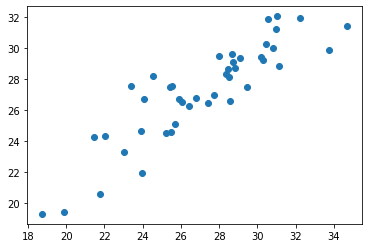

In [23]:
import matplotlib.pyplot as plt
plt.scatter(data_val['ChargeDensity(uC/m2)'], data_val['Predicted(uC/m2)'])
plt.show()

## Cross-validation

In [24]:
def get_index(random_state, data):
  kf = KFold(n_splits=5, shuffle = True, random_state=random_state)
  train_indexs = []
  test_indexs = []
  for train_index, test_index in kf.split(data):
      train_indexs.append(train_index)
      test_indexs.append(test_index)
  index=pd.DataFrame(zip(train_indexs, test_indexs), columns=['train_index','test_index'])
  return index

In [25]:
def get_scores(n_fold, index, data):
  train_index = index.iloc[n_fold,0]
  test_index = index.iloc[n_fold,1]
  train, test = data.iloc[train_index], data.iloc[test_index]
  train_shape=train.shape
  test_shape=test.shape

  def func(X,a, w, c, m, n, p):
    x,y,z,u,h = X
    return (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

  x=train['thickness(m)'].to_numpy()
  y=train['solidity'].to_numpy()
  z=train['diameter(m)'].to_numpy()
  u=train['Interface(m)'].to_numpy()
  h=train['Absolute humidity (g/m3)'].to_numpy()
  j=train['ChargeDensity(C/m2)'].to_numpy()


  # initial guesses for a,b,c,m,n,p:
  p0 = 1E-6 , 1E-10 ,1. , 1. , 1., 1.

   # trf & dogbox
       #    a          w           c        m          n       p
  bound=((  0,         0,          0,       0,         0 ,     0 ), 
       (np.inf,    np.inf,    np.inf,     np.inf,    np.inf, np.inf))
  
  ## trf
  popt_trf,pcov = curve_fit(func,(x,y,z,u,h),j, p0, bounds = bound, method='trf', maxfev=500000)

  y_model_trf = func((x,y,z,u,h),popt_trf[0],popt_trf[1],popt_trf[2], popt_trf[3],popt_trf[4],popt_trf[5]) 
  MSE_trf = np.sum((j - y_model_trf)**2)/train.shape[0]
  MAE_trf = np.sum(abs(j - y_model_trf))/train.shape[0]

  ## dogbox
  popt_dog, pcov = curve_fit(func,(x,y,z,u,h),j, p0, bounds = bound, method='dogbox', maxfev=500000)
  y_model_dog = func((x,y,z,u,h),popt_dog[0],popt_dog[1],popt_dog[2],popt_dog[3],popt_dog[4],popt_dog[5]) 
  MSE_dog = np.sum((j - y_model_dog)**2)/train.shape[0]
  MAE_dog = np.sum(abs(j - y_model_dog))/train.shape[0]

  if MSE_trf < MSE_dog:
    a,w,c,m,n,p = popt_trf[0],popt_trf[1],popt_trf[2],popt_trf[3],popt_trf[4], popt_trf[5]
    print('trf Method is the best method')
  else:
    a,w,c,m,n,p = popt_dog[0], popt_dog[1], popt_dog[2], popt_dog[3], popt_dog[4], popt_dog[5]
    print("dogbox Method is the best method")
  trf_result="trf Method | MSE = {:.2E}| MAE = {:.2E}| a = {}, w = {}, c = {},m = {}, n = {}, p = {}".format(MSE_trf,MAE_trf,popt_trf[0],popt_trf[1],popt_trf[2],popt_trf[3],popt_trf[4], popt_trf[5])
  dog_result="dog Method | MSE = {:.2E}| MAE = {:.2E}| a = {}, w = {}, c = {},m = {}, n = {}, p = {}".format(MSE_dog,MAE_dog,popt_dog[0], popt_dog[1], popt_dog[2], popt_dog[3], popt_dog[4], popt_dog[5])
  # print(trf_result)
  # print(dog_result)
  
  # Validate 
  
  data_val = pd.concat([train, test])
  x=data_val['thickness(m)'].to_numpy()
  y=data_val['solidity'].to_numpy()
  z=data_val['diameter(m)'].to_numpy()
  u=data_val['Interface(m)'].to_numpy()
  h=data_val['Absolute humidity (g/m3)'].to_numpy()
  j=data_val['ChargeDensity(C/m2)'].to_numpy()


  data_val['Predicted(C/m2)'] = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

  
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
  mape_trf = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'], data_val['Predicted(C/m2)'])
  mape_trf_train = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'][0:train.shape[0]], data_val['Predicted(C/m2)'][0:train.shape[0]])
  mape_trf_test = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'][train.shape[0]:data_val.shape[0]], data_val['Predicted(C/m2)'][train.shape[0]:data_val.shape[0]])

  return n_fold, train_shape, test_shape, mape_trf, mape_trf_train, mape_trf_test, a,w,c,m,n,p

In [26]:
for n_fold in range(5):
  n_fold, train_shape, test_shape, MAPE, train_MAPE, test_MAPE,a,w,c,m,n,p = get_scores(n_fold, index, data)
  print('n_fold={}, train_shape={}, test_shape={}, MAPE={:.2f}, train_MAPE={:.2f}, test_MAPE={:.2f}'.format(n_fold, train_shape, test_shape, MAPE, train_MAPE, test_MAPE))

trf Method is the best method
n_fold=0, train_shape=(34, 9), test_shape=(9, 9), MAPE=4.87, train_MAPE=5.07, test_MAPE=4.12
trf Method is the best method
n_fold=1, train_shape=(34, 9), test_shape=(9, 9), MAPE=4.96, train_MAPE=4.68, test_MAPE=6.02
trf Method is the best method
n_fold=2, train_shape=(34, 9), test_shape=(9, 9), MAPE=4.67, train_MAPE=4.40, test_MAPE=5.72
trf Method is the best method
n_fold=3, train_shape=(35, 9), test_shape=(8, 9), MAPE=4.65, train_MAPE=4.37, test_MAPE=5.85
trf Method is the best method
n_fold=4, train_shape=(35, 9), test_shape=(8, 9), MAPE=4.83, train_MAPE=5.03, test_MAPE=3.96


# simulation

In [27]:
avg_thickness = data['thickness(m)'].mean()
avg_solidity = data['solidity'].mean()
avg_diameter = data['diameter(m)'].mean()
avg_u = data['Interface(m)'].mean()


print('avg_thickness = {:.2f}\navg_solidity = {:.3f}\navg_diameter = {:.2f} '.format(avg_thickness, avg_solidity, avg_diameter))
print('avg_u = {:.3f}'.format(avg_u))
print('thickness | {:.2f}-{:.2f} um'.format(data['thickness(m)'].min()*1E6, data['thickness(m)'].max()*1E6))
print('solidity | {:.2f}-{:.2f}'.format(data['solidity'].min(), data['solidity'].max()))
print('diameter | {:.2f}-{:.2f} um'.format(data['diameter(m)'].min()*1E6, data['diameter(m)'].max()*1E6))

avg_thickness = 0.00
avg_solidity = 0.194
avg_diameter = 0.00 
avg_u = 0.002
thickness | 354.60-623.10 um
solidity | 0.15-0.24
diameter | 6.73-16.99 um


In [28]:
data.head()

,ChargeDensity(C/m2),thickness(m),solidity,diameter(m),Interface(m),Technique,Tem (°C),Absolute humidity (g/m3),Force (N)
0,0.000026,0.000472,0.164,0.000009,0.001728,Reicofil,26.4,6.450233,35.5
1,0.000028,0.000568,0.180,0.000009,0.001961,Reicofil,25.7,6.585998,37.1
2,0.000031,0.000473,0.181,0.000008,0.001501,Reicofil,26.9,7.297906,36.1
3,0.000030,0.000600,0.179,0.000008,0.001990,Reicofil,25.8,7.128742,37.3
4,0.000034,0.000393,0.206,0.000007,0.001106,Reicofil,26.9,7.297906,36.1


In [29]:
set_thickness = data.loc[0]['thickness(m)']
set_solidity = data.loc[0]['solidity']
set_diameter = data.loc[0]['diameter(m)']
set_u = data.loc[0]['Interface(m)']
set_h = data.loc[0]['Absolute humidity (g/m3)']
print('set_thickness = {:.3E}\nset_solidity = {:.3f}\nset_diameter = {:.2E} \nset_u= {:.3f} \nset_h= {:.1f}'.format(set_thickness, set_solidity, set_diameter, set_u, set_h))

set_j = data.loc[0]['ChargeDensity(C/m2)']
print('measured j= {:.2E}'.format(set_j))

set_thickness = 4.724E-04
set_solidity = 0.164
set_diameter = 9.09E-06 
set_u= 0.002 
set_h= 6.5
measured j= 2.64E-05


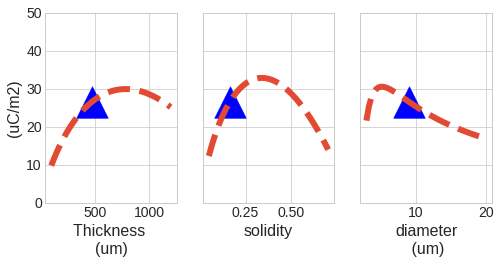

In [30]:
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.facecolor'] = 'none'


fig, ax = plt.subplots(1,3, figsize=(8,3.5), sharey=True)


#-----------------------------------------------------------------------------------------------
# Thickness ~ charge
x = np.linspace(100, 1200)*pow(10,-6)
y = set_solidity
z = set_diameter
u = set_u
h = set_h

J =  (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

ax[0].plot(x*pow(10,6), J*pow(10,6), linestyle="--", linewidth = 6)
ax[0].scatter(set_thickness*pow(10,6), set_j*pow(10,6), c='b', marker = '^', s=1000)

ax[0].set_xlabel("Thickness \n(um)", fontsize=16)
ax[0].set_ylabel("(uC/m2)", fontsize=16)
ax[0].tick_params(axis = 'x', labelsize=14)
ax[0].tick_params(axis = 'y', labelsize=14)
ax[0].set_ylim(0,50)



#-----------------------------------------------------------------------------------------------
# solidity ~ charge

x = set_thickness
y = np.linspace(0.05, 0.7)
z = set_diameter
u = set_u
h = set_h

J = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)


ax[1].plot(y,J*pow(10,6), linestyle="--", linewidth = 6)
ax[1].scatter(set_solidity, set_j*pow(10,6), c='b', marker = '^', s=1000)

ax[1].set_xlabel("solidity", fontsize=16)

ax[1].tick_params(axis = 'x', labelsize=14)
ax[1].tick_params(axis = 'y', labelsize=14)

    
#-----------------------------------------------------------------------------------------------
# Diameter ~ Charge

x = set_thickness
y = set_solidity
z = np.linspace(3, 20)*pow(10,-6)
u = set_u
h = set_h

J =  (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

ax[2].plot(z*pow(10,6),J*pow(10,6), linestyle="--", linewidth = 6)
ax[2].scatter(set_diameter*pow(10,6), set_j*pow(10,6), c='b', marker = '^', s=1000)

ax[2].set_xlabel("diameter\n (um)", fontsize=16)




ax[2].tick_params(axis = 'x', labelsize=14)
ax[2].tick_params(axis = 'y', labelsize=14)

In [31]:
simulation_df = pd.DataFrame()

#-----------------------------------------------------------------------------------------------
# Thickness ~ charge
x = np.linspace(100, 1200)*pow(10,-6)
y = set_solidity
z = set_diameter
u = set_u
h = set_h

J = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)


simulation_df['thickness (um)']=np.linspace(100, 1200)
simulation_df['charge (uC)_1']=J*pow(10,6)

#-----------------------------------------------------------------------------------------------
# solidity ~ charge

x = set_thickness
y = np.linspace(0.05, 0.7)
z = set_diameter
u = set_u
h = set_h

J = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)




simulation_df['solidity']=y
simulation_df['charge (uC)_2']=J*pow(10,6)

    
#-----------------------------------------------------------------------------------------------
# Diameter ~ Charge

x = set_thickness
y = set_solidity
z = np.linspace(3, 20)*pow(10,-6)
u = set_u
h = set_h

J = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)



simulation_df['diameter (um)']=z*pow(10,6)
simulation_df['charge (uC)_3']=J*pow(10,6)

In [32]:
simulation_df.head()

,thickness (um),charge (uC)_1,solidity,charge (uC)_2,diameter (um),charge (uC)_3
0,100.000000,9.795811,0.050000,12.325476,3.000000,21.628099
1,122.448980,11.444686,0.063265,14.649440,3.346939,25.300604
2,144.897959,12.973373,0.076531,16.747537,3.693878,27.622739
3,167.346939,14.395777,0.089796,18.650623,4.040816,29.063797
4,189.795918,15.722488,0.103061,20.381259,4.387755,29.914836


In [33]:
simulation_df.to_excel('simulation_df_SEBS.xlsx')

# Validation at different random seeds

In [34]:
def get_index(random_state, data):
  kf = KFold(n_splits=5, shuffle = True, random_state=random_state)
  train_indexs = []
  test_indexs = []
  for train_index, test_index in kf.split(data):
      train_indexs.append(train_index)
      test_indexs.append(test_index)
  index=pd.DataFrame(zip(train_indexs, test_indexs), columns=['train_index','test_index'])
  return index

In [35]:
def get_scores(n_fold, index, data):
  train_index = index.iloc[n_fold,0]
  test_index = index.iloc[n_fold,1]
  train, test = data.iloc[train_index], data.iloc[test_index]
  train_shape=train.shape
  test_shape=test.shape

  def func(X,a, w, c, m, n, p):
    x,y,z,u,h = X
    return (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

  x=train['thickness(m)'].to_numpy()
  y=train['solidity'].to_numpy()
  z=train['diameter(m)'].to_numpy()
  u=train['Interface(m)'].to_numpy()
  h=train['Absolute humidity (g/m3)'].to_numpy()
  j=train['ChargeDensity(C/m2)'].to_numpy()


  # initial guesses for a,b,c,m,n,p:
  p0 = 1E-6 , 1E-10 ,1. , 1. , 1., 1.

   # trf & dogbox
       #    a          w           c        m          n       p
  bound=((  0,         0,          0,       0,         0 ,     0 ), 
       (np.inf,    np.inf,    np.inf,     np.inf,    np.inf, np.inf))
  
  ## trf
  popt_trf,pcov = curve_fit(func,(x,y,z,u,h),j, p0, bounds = bound, method='trf', maxfev=500000)

  y_model_trf = func((x,y,z,u,h),popt_trf[0],popt_trf[1],popt_trf[2], popt_trf[3],popt_trf[4],popt_trf[5]) 
  MSE_trf = np.sum((j - y_model_trf)**2)/train.shape[0]
  MAE_trf = np.sum(abs(j - y_model_trf))/train.shape[0]

  ## dogbox
  popt_dog, pcov = curve_fit(func,(x,y,z,u,h),j, p0, bounds = bound, method='dogbox', maxfev=500000)
  y_model_dog = func((x,y,z,u,h),popt_dog[0],popt_dog[1],popt_dog[2],popt_dog[3],popt_dog[4],popt_dog[5]) 
  MSE_dog = np.sum((j - y_model_dog)**2)/train.shape[0]
  MAE_dog = np.sum(abs(j - y_model_dog))/train.shape[0]

  if MSE_trf < MSE_dog:
    a,w,c,m,n,p = popt_trf[0],popt_trf[1],popt_trf[2],popt_trf[3],popt_trf[4], popt_trf[5]
    print('trf Method is the best method')
  else:
    a,w,c,m,n,p = popt_dog[0], popt_dog[1], popt_dog[2], popt_dog[3], popt_dog[4], popt_dog[5]
    print("dogbox Method is the best method")
  trf_result="trf Method | MSE = {:.2E}| MAE = {:.2E}| a = {}, w = {}, c = {},m = {}, n = {}, p = {}".format(MSE_trf,MAE_trf,popt_trf[0],popt_trf[1],popt_trf[2],popt_trf[3],popt_trf[4], popt_trf[5])
  dog_result="dog Method | MSE = {:.2E}| MAE = {:.2E}| a = {}, w = {}, c = {},m = {}, n = {}, p = {}".format(MSE_dog,MAE_dog,popt_dog[0], popt_dog[1], popt_dog[2], popt_dog[3], popt_dog[4], popt_dog[5])
  # print(trf_result)
  # print(dog_result)
  
  # Validate 
  
  data_val = pd.concat([train, test])
  x=data_val['thickness(m)'].to_numpy()
  y=data_val['solidity'].to_numpy()
  z=data_val['diameter(m)'].to_numpy()
  u=data_val['Interface(m)'].to_numpy()
  h=data_val['Absolute humidity (g/m3)'].to_numpy()
  j=data_val['ChargeDensity(C/m2)'].to_numpy()


  data_val['Predicted(C/m2)'] = (a-w*h)*(2*x*y/z-c*y**m*x**n/z**p)*0.01/(0.01+u)

  
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
  mape_trf = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'], data_val['Predicted(C/m2)'])
  mape_trf_train = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'][0:train.shape[0]], data_val['Predicted(C/m2)'][0:train.shape[0]])
  mape_trf_test = mean_absolute_percentage_error(data_val['ChargeDensity(C/m2)'][train.shape[0]:data_val.shape[0]], data_val['Predicted(C/m2)'][train.shape[0]:data_val.shape[0]])

  return n_fold, train_shape, test_shape, mape_trf, mape_trf_train, mape_trf_test, a,w,c,m,n,p

In [36]:
max_random_sate = 200

In [37]:
random_states = []
n_folds = []
train_shapes = []
test_shapes = []

MAPEs = []
train_MAPEs = []
test_MAPEs = []

a_list = []
w_list = []
c_list = []
m_list = []
n_list = []
p_list = []


for random_state in range(max_random_sate):
  index = get_index(random_state, data)
  for n_fold in range(1):
    random_states.append(random_state)
    n_fold, train_shape, test_shape, MAPE, train_MAPE, test_MAPE,a,w,c,m,n,p = get_scores(n_fold, index, data)
    n_folds.append(n_fold)
    train_shapes.append(train_shape)
    test_shapes.append(test_shape)
    
    MAPEs.append(MAPE)
    train_MAPEs.append(train_MAPE)
    test_MAPEs.append(test_MAPE)
    a_list.append(a)
    w_list.append(w)
    c_list.append(c)
    m_list.append(m)
    n_list.append(n)
    p_list.append(p)


trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method is the best method
trf Method

In [38]:
summary = pd.DataFrame()
summary['random_state']=random_states
summary['n_fold']=n_folds
summary['train_shape'] = train_shapes
summary['test_shape'] = test_shapes

summary['MAPE'] = MAPEs
summary['train_MAPE'] = train_MAPEs
summary['test_MAPE'] = test_MAPEs
summary['a'] = a_list
summary['w'] = w_list
summary['c'] = c_list
summary['m'] = m_list
summary['n'] = n_list
summary['p'] = p_list


summary

,random_state,n_fold,train_shape,test_shape,MAPE,train_MAPE,test_MAPE,a,w,c,m,n,p
0,0,0,"(34, 9)","(9, 9)",4.748047,4.644623,5.138758,0.000006,1.916903e-07,0.519276,1.311263,1.294033,1.318679
1,1,0,"(34, 9)","(9, 9)",4.946955,4.528870,6.526389,0.000017,6.443090e-07,1.503329,1.086077,1.101274,1.092031
2,2,0,"(34, 9)","(9, 9)",4.720453,4.349425,6.122115,0.000007,2.503266e-07,0.355450,1.220086,1.266978,1.323110
3,3,0,"(34, 9)","(9, 9)",4.714805,4.393467,5.928748,0.000005,1.735747e-07,0.306178,1.330226,1.348532,1.397108
4,4,0,"(34, 9)","(9, 9)",4.896648,4.761657,5.406611,0.000006,2.195146e-07,0.353918,1.344780,1.369645,1.399416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0,"(34, 9)","(9, 9)",4.872326,4.825089,5.050775,0.000016,6.212983e-07,1.278986,1.091386,1.104991,1.107513
196,196,0,"(34, 9)","(9, 9)",4.868241,4.758070,5.284444,0.000009,3.254984e-07,0.867185,1.196562,1.196027,1.205801
197,197,0,"(34, 9)","(9, 9)",4.893024,5.101198,4.106587,0.000012,3.640062e-07,1.285528,1.118535,1.132415,1.126153
198,198,0,"(34, 9)","(9, 9)",4.848737,4.351377,6.727653,0.000011,3.525565e-07,0.901978,1.141860,1.149256,1.167837


In [39]:
summary.describe()

,random_state,n_fold,MAPE,train_MAPE,test_MAPE,a,w,c,m,n,p
count,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.0,4.838504,4.603268,5.727173,0.000017,5.198840e-07,1.023529,1.186657,1.200276,1.203793
std,57.879185,0.0,0.142974,0.391001,1.478621,0.000021,6.553118e-07,0.434883,0.126682,0.138789,0.141026
min,0.000000,0.0,4.578697,3.088374,2.645422,0.000004,7.624547e-08,0.044315,1.007609,1.008726,1.010048
25%,49.750000,0.0,4.740599,4.384608,4.713169,0.000007,2.210653e-07,0.724093,1.097684,1.100050,1.107525
50%,99.500000,0.0,4.823564,4.646238,5.658797,0.000009,3.038536e-07,0.991992,1.166789,1.181758,1.182964
75%,149.250000,0.0,4.915741,4.898174,6.739034,0.000014,4.443837e-07,1.280622,1.242408,1.260814,1.262196
max,199.000000,0.0,5.596320,5.401709,10.452762,0.000137,4.840303e-06,1.906817,1.809055,1.861517,1.928572


Text(0, 0.5, 'p')

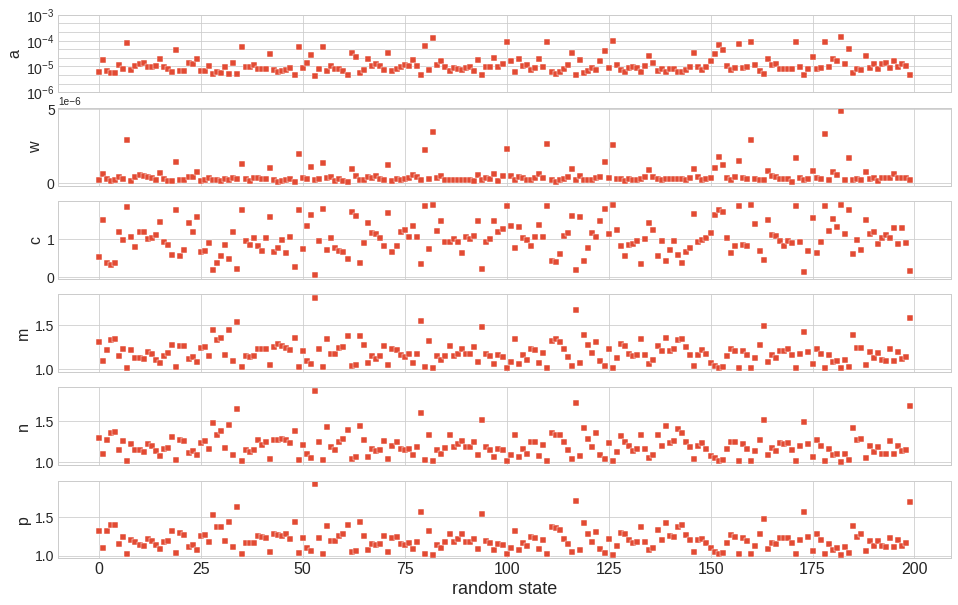

In [40]:
fig, ax = plt.subplots(6,1, figsize=(16,10), sharex=True)

sns.scatterplot(ax=ax[0], data=summary, x="random_state", y="a", marker = 's')
ax[0].set_yscale('log')
ax[0].set_yticks(np.logspace(-6, -3, 10))
ax[0].tick_params(axis = 'y', labelsize=14)
ax[0].set_xlabel("random state", fontsize=16)
ax[0].set_ylabel("a", fontsize=16)

sns.scatterplot(ax=ax[1], data=summary, x="random_state", y="w", marker = 's')
ax[1].tick_params(axis = 'y', labelsize=14)
ax[1].set_xlabel("random state", fontsize=16)
ax[1].set_ylabel("w", fontsize=16)
sns.scatterplot(ax=ax[2], data=summary, x="random_state", y="c", marker = 's')
ax[2].tick_params(axis = 'x', labelsize=16)
ax[2].tick_params(axis = 'y', labelsize=14)
ax[2].set_xlabel("random state", fontsize=16)
ax[2].set_ylabel("c", fontsize=16)

sns.scatterplot(ax=ax[3], data=summary, x="random_state", y="m", marker = 's')
ax[3].tick_params(axis = 'x', labelsize=16)
ax[3].tick_params(axis = 'y', labelsize=14)
ax[3].set_xlabel("random state", fontsize=16)
ax[3].set_ylabel("m", fontsize=16)


sns.scatterplot(ax=ax[4], data=summary, x="random_state", y="n", marker = 's')
ax[4].tick_params(axis = 'x', labelsize=16)
ax[4].tick_params(axis = 'y', labelsize=14)
ax[4].set_xlabel("random state", fontsize=16)
ax[4].set_ylabel("n", fontsize=16)


sns.scatterplot(ax=ax[5], data=summary, x="random_state", y="p", marker = 's')
ax[5].tick_params(axis = 'x', labelsize=16)
ax[5].tick_params(axis = 'y', labelsize=14)
ax[5].set_xlabel("random state", fontsize=18)
ax[5].set_ylabel("p", fontsize=16)

In [41]:
summary.to_csv('200RandomState_SEBS.csv')

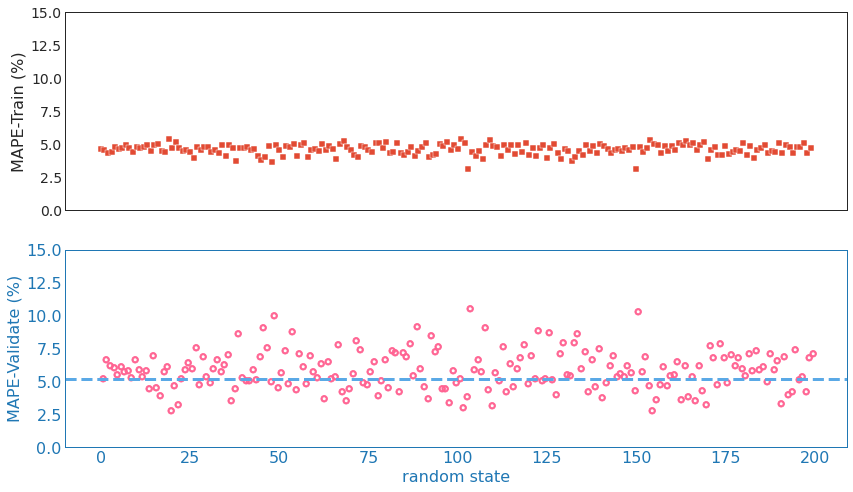

In [42]:
sns.set_style("white")
plt.rcParams['axes.facecolor'] = 'none'


fig, ax = plt.subplots(2,1, figsize=(14,8), sharex=True)
sns.scatterplot(ax=ax[0], data=summary, x="random_state", y="train_MAPE", marker = 's')
ax[0].set_xlabel("random state", fontsize=16)
ax[0].set_ylabel("MAPE-Train (%)", fontsize=16)
ax[0].tick_params(axis = 'x', labelsize=14)
ax[0].tick_params(axis = 'y', labelsize=14)
ax[0].set_ylim(0,15)


sns.scatterplot(ax=ax[1], data=summary, x="random_state", y="test_MAPE", marker="$\circ$", s=100, color = '#ff6392', ec="face")


ax[1].set_xlabel("random state", fontsize=16)
ax[1].set_ylabel("MAPE-Validate (%)", fontsize=16)
ax[1].tick_params(axis = 'x', labelsize=16)
ax[1].tick_params(axis = 'y', labelsize=16)
ax[1].xaxis.label.set_color('tab:blue')
ax[1].yaxis.label.set_color('tab:blue')
ax[1].set_ylim(0,15)
l2=ax[1].axhline(5.20, color='#5AA9E6', ls='dashed', linewidth=3)
ax[1].tick_params(axis='x', colors='tab:blue')
ax[1].tick_params(axis='y', colors='tab:blue')

ax[1].spines['bottom'].set_color('tab:blue')
ax[1].spines['top'].set_color('tab:blue')
ax[1].spines['right'].set_color('tab:blue')
ax[1].spines['left'].set_color('tab:blue')